## Sample Script for 1 df


# After resampling we can continue with features

In [1]:
from pathlib import Path
if Path.cwd().stem == 'physiology':
    %cd ../../..
    %load_ext autoreload
    %autoreload 2

/Users/visser/drive/PhD/Code/pain-measurement


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import neurokit2 as nk
import mne

from src.helper_func import flatten_list
from src.data.info_data import TRIAL, RATING, TEMPERATURE, EDA, ECG, EEG, PUPILLOMETRY, AFFECTIVA, SYSTEM
#from src.data.info_participants import 
from src.data.process_raw import load_participant_data
from src.data.process_iterim import create_timedelta_index, create_trial_index, reorder_multiindex, interpolate, resample, resample_to_500hz, standardize, normalize

pd.options.mode.chained_assignment = None  # default='warn'

ModuleNotFoundError: No module named 'src'

In [ ]:
# Example usage
base_path = 'data/raw/'
participant_ids =  [
    '001_pilot_bjoern',
    '002_pilot_melis'
    ]

data_infos = [
    TRIAL,
    RATING,
    TEMPERATURE,
    EDA,
    #ECG,
    #EEG,
    #PUPILLOMETRY,
    #AFFECTIVA,
    #SYSTEM
]

participants = [load_participant_data(participant_id, base_path, data_infos) for participant_id in participant_ids]
participants_df = {participant.id: participant.to_dataframe() for participant in participants}

sampling_rate = 128

df = participants_df[list(participants_df)[0]]
df = create_timedelta_index(df)
df = create_trial_index(df)
df = reorder_multiindex(df)
# df = resample_to_500hz(df)
# df = resample(df, ms=1000/sampling_rate)
# df = interpolate(df)
# df = normalize(df)
#df = standardize(df)
print('df size:', round(sys.getsizeof(df) / 1024**2), 'MB')
df

df size: 48 MB


Timestamp  MarkerDescription  Rating  \
Trial Time                                                              
1     0 days 00:02:13.972000  1.339723e+05                320     NaN   
      0 days 00:02:13.977000  1.339773e+05                320    50.0   
      0 days 00:02:13.978000  1.339783e+05                320     NaN   
      0 days 00:02:13.988000  1.339883e+05                320     NaN   
      0 days 00:02:13.997000  1.339973e+05                320    50.0   
...                                    ...                ...     ...   
11    0 days 01:00:51.379000  3.651379e+06                  3     NaN   
      0 days 01:00:51.387000  3.651387e+06                  3     NaN   
      0 days 01:00:51.398000  3.651398e+06                  3   100.0   
      0 days 01:00:51.400000  3.651400e+06                  3     NaN   
      0 days 01:00:51.401000  3.651401e+06                  3     NaN   

                              Temperature  Timestamp CAL  GSR RAW  \
Trial Time                                                          
1     0 days 00:02:13.972000          NaN            NaN      NaN   
      0 days 00:02:13.977000         38.7            NaN      NaN   
      0 days 00:02:13.978000          NaN   6.575078e+05  17974.0   
      0 days 00:02:13.988000          NaN   6.575234e+05  17974.0   
      0 days 00:02:13.997000         38.7            NaN      NaN   
...                                   ...            ...      ...   
11    0 days 01:00:51.379000          NaN   4.175047e+06  19194.0   
      0 days 01:00:51.387000          NaN   4.175062e+06  19196.0   
      0 days 01:00:51.398000          NaN            NaN      NaN   
      0 days 01:00:51.400000          NaN   4.175070e+06  19194.0   
      0 days 01:00:51.401000          NaN            NaN      NaN   

                              GSR Conductance CAL  
Trial Time                                         
1     0 days 00:02:13.972000                  NaN  
      0 days 00:02:13.977000                  NaN  
      0 days 00:02:13.978000             4.632998  
      0 days 00:02:13.988000             4.632998  
      0 days 00:02:13.997000                  NaN  
...                                           ...  
11    0 days 01:00:51.379000            10.861380  
      0 days 01:00:51.387000            10.871591  
      0 days 01:00:51.398000                  NaN  
      0 days 01:00:51.400000            10.861380  
      0 days 01:00:51.401000                  NaN  

[484283 rows x 7 columns]

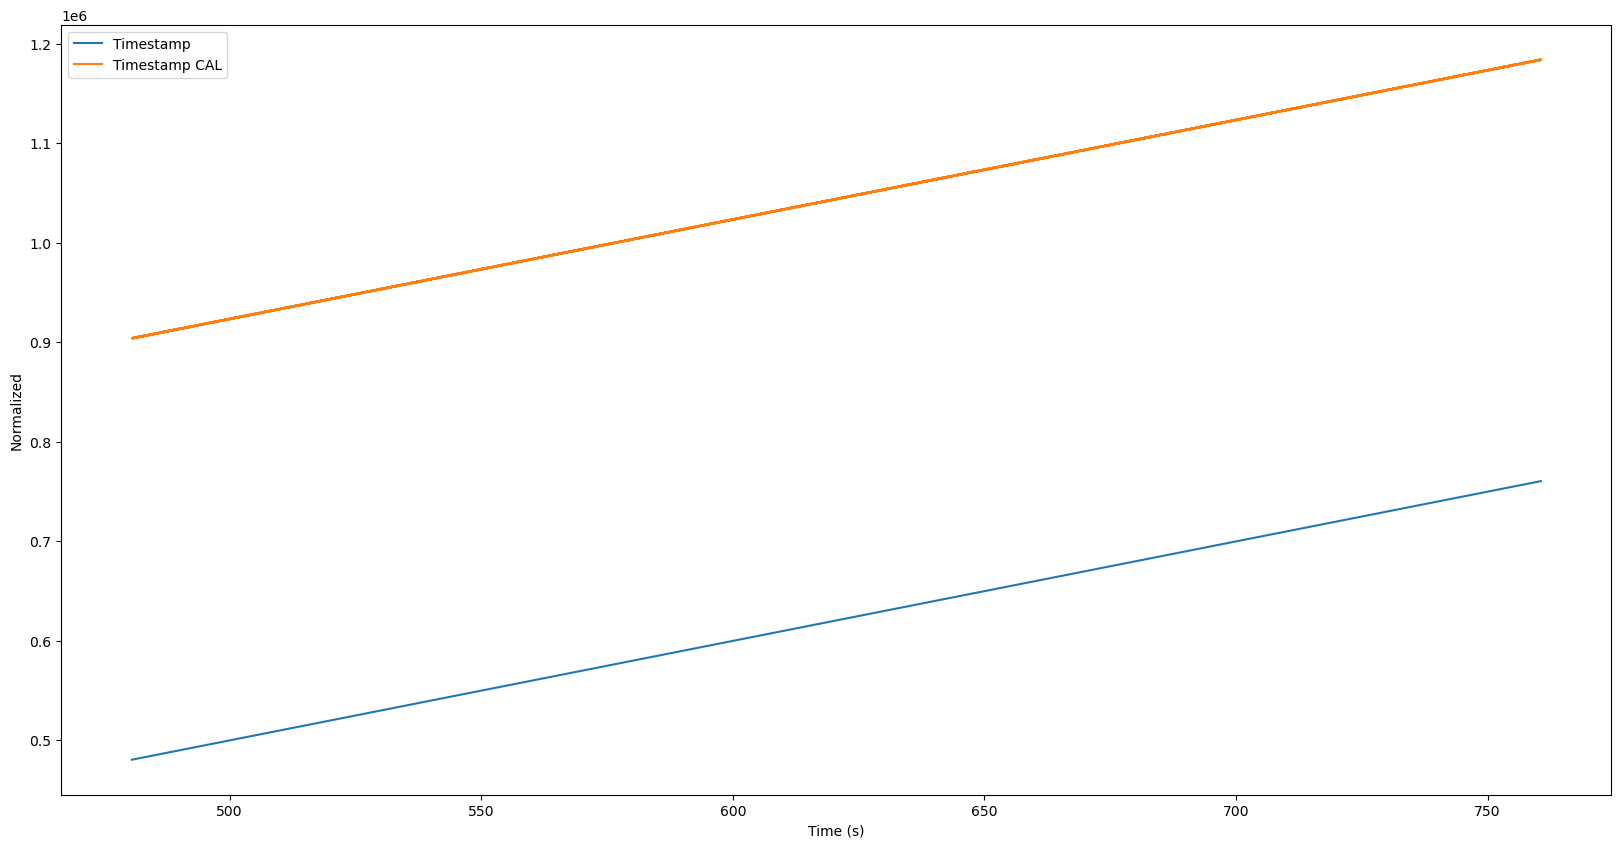

In [ ]:
trial = 2
df_stimuli = df.loc[trial].copy()

data = flatten_list([data_info.plot_columns for data_info in data_infos if data_info.plot_columns is not None])
#data.append('phasicdata')
data = ['Timestamp', 'Timestamp CAL']

# fig = px.line(df_stimuli, y=data, x=df_stimuli['Timestamp']/1000)
# fig.update_xaxes(
#     title_text='Time (s)',
#     tickmode='linear',
#     tick0=0,
#     dtick=10)
#fig.show()

# using matplotlib
fig, ax = plt.subplots(figsize=(20, 10))
for column in data:
    ax.plot(df_stimuli['Timestamp']/1000, df_stimuli[column]-100000 if column == 'Timestamp CAL' else df_stimuli[column], label=column)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Normalized')
ax.legend()
plt.show()

In [ ]:
start = df.loc[1].iloc[0].Timestamp
end = df.loc[1].iloc[-1].Timestamp
time = (end - start)
time = time # / 1000 / 60
time = pd.Timedelta(time, unit='ms')
time

Timedelta('0 days 00:04:40.031265900')

In [ ]:
trial = 3
minute = pd.Timedelta(3, unit='m')

start = df.loc[trial].iloc[0].name
end = start + minute
num_samples = len(df.loc[trial].loc[start:end]['ECG LL-RA RAW'].dropna())

sample_rate = num_samples / minute.total_seconds()
sample_rate

KeyError: 'ECG LL-RA RAW'

In [ ]:
df.loc[1].loc[df.iloc[0].Timestamp:'4min30s']

TypeError: cannot do slice indexing on TimedeltaIndex with these indexers [133972.3243] of type float64

In [ ]:
df['GSR Conductance CAL'].dropna().shape[0] / time


TypeError: unsupported operand type(s) for /: 'int' and 'Timedelta'

,Timestamp,MarkerDescription,Rating,Temperature,GSR RAW,GSR Conductance CAL,phasicdata
Time,,,,,,,
0 days 00:14:59.310000,8.993137e+05,NaN,NaN,NaN,0.634470,0.634470,0.023557
0 days 00:14:59.317812500,8.993177e+05,NaN,0.5,0.000000,0.634186,0.634186,0.023273
0 days 00:14:59.325625,8.993311e+05,NaN,0.5,0.000000,0.633902,0.633902,0.022988
0 days 00:14:59.333437500,8.993366e+05,NaN,0.5,0.000000,0.633617,0.633617,0.022704
0 days 00:14:59.341250,8.993421e+05,NaN,0.5,0.000000,0.633333,0.633333,0.022420
...,...,...,...,...,...,...,...
0 days 00:19:39.286562500,1.179291e+06,NaN,1.0,0.852647,0.261364,0.261364,0.052523
0 days 00:19:39.294375,1.179301e+06,NaN,1.0,0.852647,0.261364,0.261364,0.052527
0 days 00:19:39.302187500,1.179307e+06,NaN,1.0,0.852647,0.261364,0.261364,0.052531


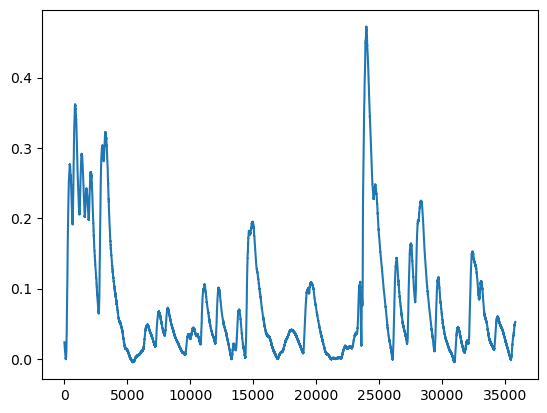

In [ ]:
import ledapy
sampling_rate = 128

rawdata = df_stimuli['GSR RAW'].dropna()
phasicdata = ledapy.runner.getResult(rawdata, 'phasicdata', sampling_rate, downsample=1, optimisation=2)
import matplotlib.pyplot as plt  # note: requires matplotlib, not installed by default
plt.plot(phasicdata)
phasicdata.shape, rawdata.shape
df_stimuli['phasicdata'] = phasicdata   
df_stimuli

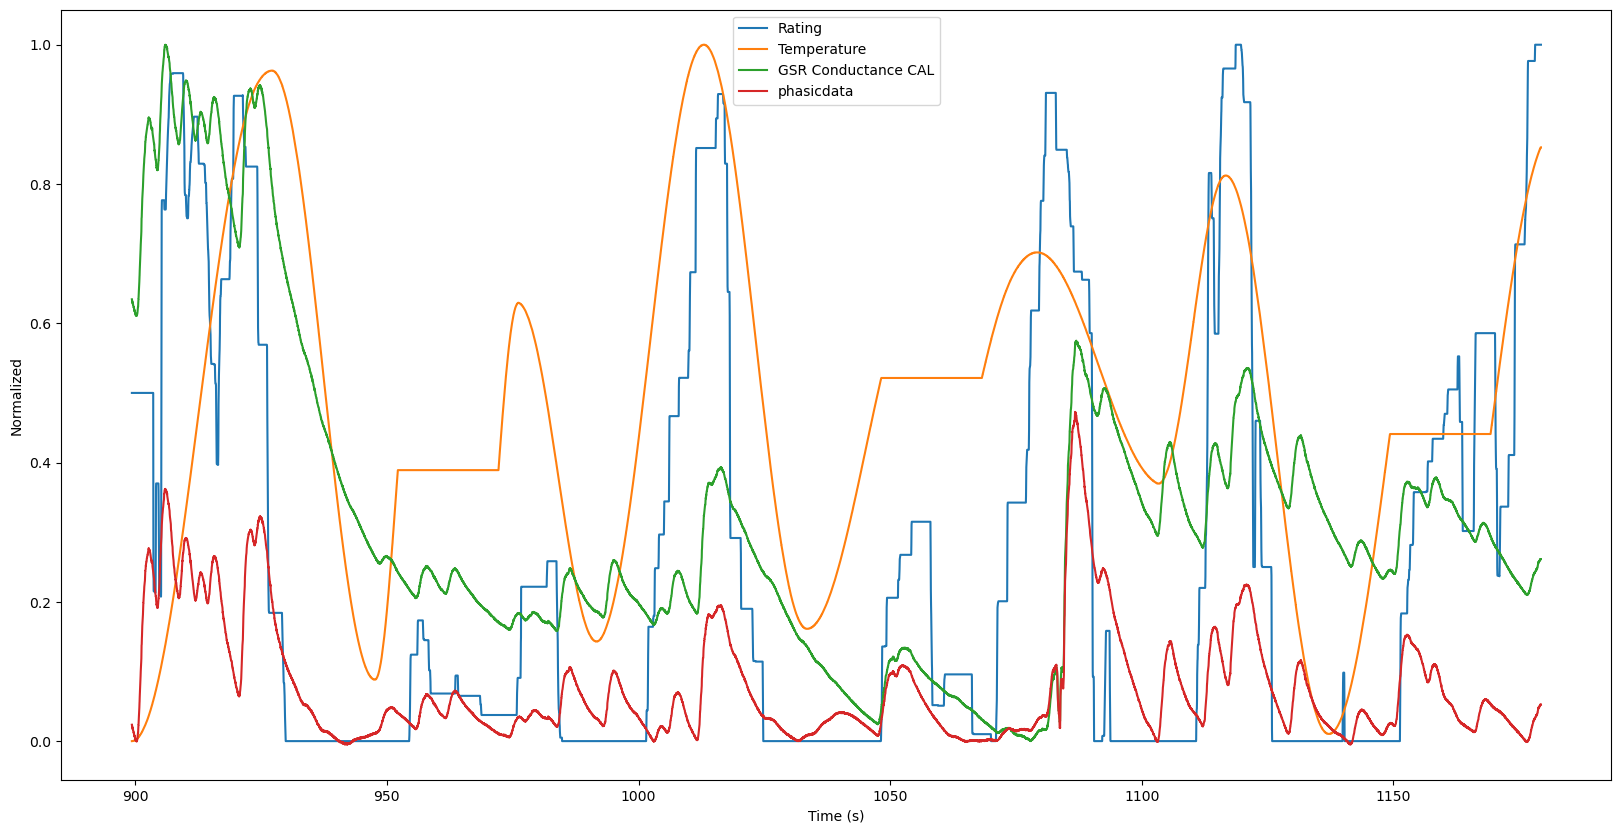

In [ ]:
trial = 5
#df_stimuli = df.loc[trial].copy()

data = flatten_list([data_info.plot_columns for data_info in data_infos if data_info.plot_columns is not None])
data.append('phasicdata')

# fig = px.line(df_stimuli, y=data, x=df_stimuli['Timestamp']/1000)
# fig.update_xaxes(
#     title_text='Time (s)',
#     tickmode='linear',
#     tick0=0,
#     dtick=10)
#fig.show()

# using matplotlib
fig, ax = plt.subplots(figsize=(20, 10))
for column in data:
    ax.plot(df_stimuli['Timestamp']/1000, df_stimuli[column], label=column)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Normalized')
ax.legend()
plt.show()


In [ ]:
import pickle
with open('/Users/visser/Downloads/eeg_1min_200hz.pickle', 'rb') as f:
    raw = pickle.load(f)

events = mne.find_events(raw, stim_channel='STI 014', verbose=False)
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'face': 5, 'buttonpress': 32}
              
sampling_rate = raw.info["sfreq"]  # Store the sampling rate

NotImplementedError: cannot instantiate 'WindowsPath' on your system

In [ ]:
import pickle

import mne

raw = mne.io.read_raw_fif(
    mne.datasets.sample.data_path() / "MEG/sample/sample_audvis_raw.fif",
    preload=True,
    verbose=False,
)
raw = raw.pick(["eeg", "eog", "stim"], verbose=False)
raw = raw.crop(0, 60)
raw = raw.resample(200)

# raw.ch_names

# raw.info["sfreq"]

# Store data (serialize)
with open("eeg_1min_200hz.pickle", "wb") as handle:
    pickle.dump(raw, handle, protocol=pickle.HIGHEST_PROTOCOL)

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|█████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 3.28TB/s]
Untarring contents of '/Users/visser/mne_data/MNE-sample-data-processed.tar.gz' to '/Users/visser/mne_data'


Attempting to create new mne-python configuration file:
/Users/visser/.mne/mne-python.json
Download complete in 01m22s (1576.2 MB)
86 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
86 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]


In [ ]:
ecg = df_stimuli['ECG LL-RA CAL'].copy().dropna()
ecg
plt.plot(ecg.iloc[0:1000])
ecg.describe()
# ecg = ecg.to_numpy()
# ecg = ecg.reshape(-1, 1)

KeyError: 'ECG LL-RA CAL'

In [ ]:
processed_ecg, info = nk.ecg_process(ecg, sampling_rate=500)
processed_ecg.ECG_Quality.mean()

0.8953375145153525

0.8953375145153525

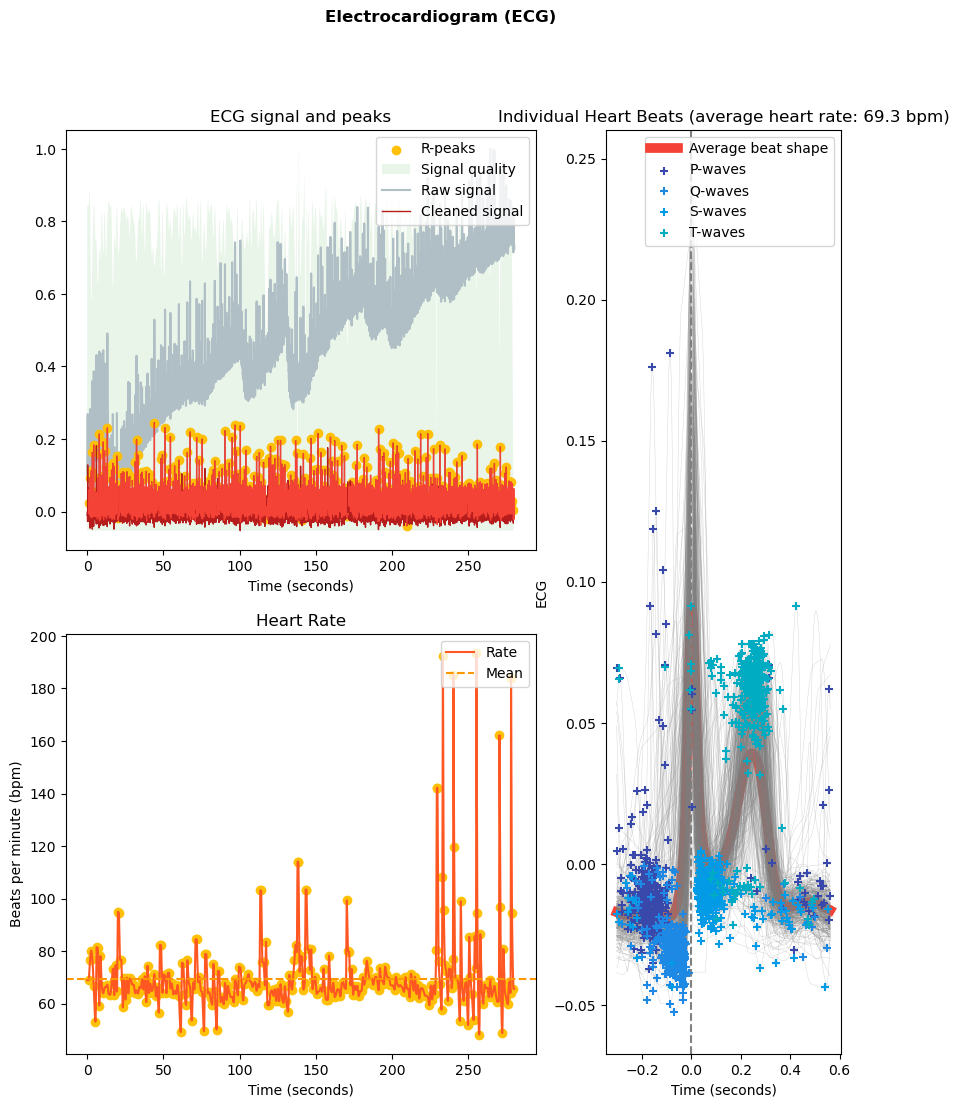

In [ ]:
import neurokit2 as nk


ecg = df_stimuli['ECG LL-RA CAL'].dropna()
ecg
processed_ecg, info = nk.ecg_process(ecg, sampling_rate=500)
# Plot
nk.ecg_plot(processed_ecg, info=info)
fig = plt.gcf()
fig.set_size_inches(10, 12, forward=True)
processed_ecg.ECG_Quality.mean()

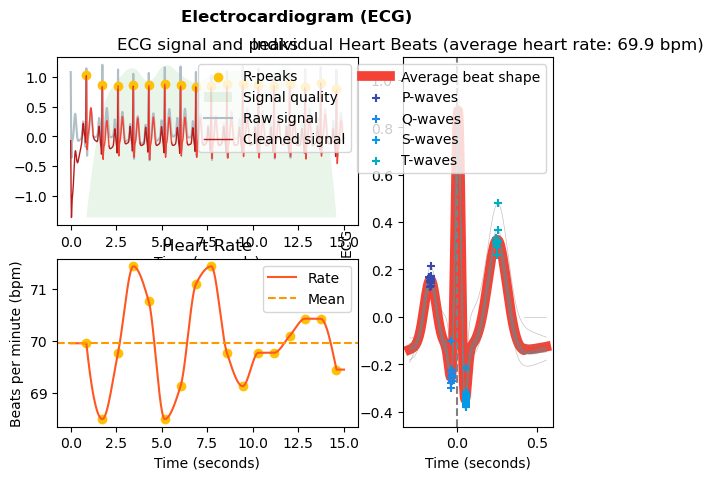

In [ ]:
# Generate 15 seconds of ECG signal (recorded at 250 samples/second)
ecg = nk.ecg_simulate(duration=15, sampling_rate=250, heart_rate=70)

# Process it
signals, info = nk.ecg_process(ecg, sampling_rate=250)

# Visualise the processing
nk.ecg_plot(signals, info)

In [ ]:
signals = nk.ecg_clean(ecg, sampling_rate=500, method='neurokit')
nk.ecg_quality(
    signals, rpeaks=None, 
    sampling_rate=512, 
    method="zhao2018", 
    approach="fuzzy")


'Barely acceptable'

### Sanity checks
TODO: make unit test

In [ ]:
# Check stimuli length, must be >= stimuli.duration
# where we create a stimulus object from the config file with the right seed, etc.
# Also check after resampling, interpolation, etc.
(df.groupby('Trial').last().Timestamp - df.groupby('Trial').first().Timestamp).astype('timedelta64[ms]')


Trial
1   0 days 00:04:40.044000
2   0 days 00:04:40.046000
3   0 days 00:04:40.011000
4   0 days 00:04:40.031000
5   0 days 00:04:40.029000
6   0 days 00:04:40.030000
Name: Timestamp, dtype: timedelta64[ms]

In [ ]:
# Control data quality


In [ ]:
# search for nan values in raw data (trial + data)